In [1]:
import sys
sys.path.append("../src")

from utils.load_model import get_model

from my_model import get_ilsvrc2012

from torch.utils.data import DataLoader

from utils.imagenet1000_classname import imgnet_label_name
from utils.tensortracker import TensorTracker
from utils import plots

In [2]:
%matplotlib inline

In [3]:
import os

import torch
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

import torch.nn as nn

import svcca

In [4]:
from my_model import my_resnet

from glob import glob

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [5]:
from utils.receptive_field_tracker import RFTracker

from collections import OrderedDict

from utils.analysis import make_dir

In [19]:
root = "/data2/genta/resnet/analysis/optimalinput-seeds/"
key_arch = "resnet34-plain4"
key_layer = "layer1"

In [20]:
exts = ("png", "pdf")

In [21]:
out_dir = os.path.join("20210106", "{}_{}".format(key_arch, key_layer))
out_dir = os.path.join("20210131", "{}_{}".format(key_arch, key_layer))
make_dir(out_dir)

In [22]:
# seeds = [0, 1230, 2020, 20201230]
seeds = [0, 1230, 2020]
key_word = "add_func"
key_word = "bn2"
imgs_seed = {}
for seed in seeds:
    imgs = []
    for path in sorted(glob(os.path.join(root, "{}*{}*{}".format(key_arch, key_layer, key_word), "*{:08}.npy".format(seed)))):
        print(path)
        data = np.load(path)
        print(data.shape)
        imgs.append(data)
    imgs_seed[seed] = imgs

/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-plain4_layer-layer1.0.bn2/other-images00000000.npy
(64, 3, 27, 27)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-plain4_layer-layer1.1.bn2/other-images00000000.npy
(64, 3, 43, 43)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-plain4_layer-layer1.2.bn2/other-images00000000.npy
(64, 3, 59, 59)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-plain4_layer-layer1.0.bn2/other-images00001230.npy
(64, 3, 27, 27)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-plain4_layer-layer1.1.bn2/other-images00001230.npy
(64, 3, 43, 43)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-plain4_layer-layer1.2.bn2/other-images00001230.npy
(64, 3, 59, 59)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-plain4_layer-layer1.0.bn2/other-images00002020.npy
(64, 3, 27, 27)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-plain4_layer-layer1.1.bn2/other-images00002020.npy
(64, 3, 43, 43)
/data2/g

In [23]:
def preprocess(_img):
    img = plots.normalize_inputspace(_img)
    img = plots.input2image(img)
#     img = plots.input2image(_img)
    return img

seed = 0
ch = 19
tmp_imgs = [preprocess(im[ch]) for seed in seeds for im in imgs_seed[seed]]

In [24]:
out_name = "{:03}".format(ch)

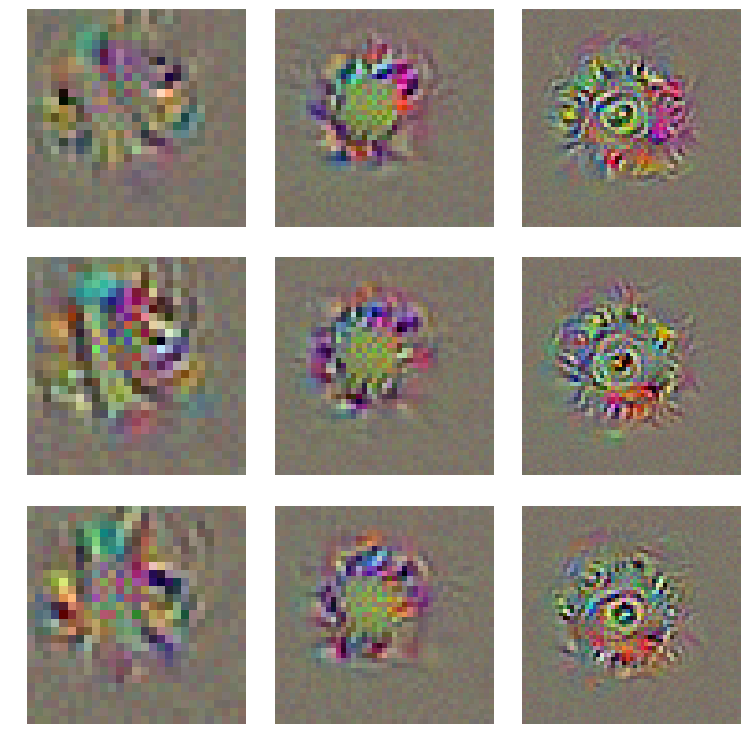

In [26]:
plots.plot_imshows(tmp_imgs, show_flag=True, nrow=len(seeds), ncol=3, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)

In [29]:
def preprocess(_img):
#     img = plots.normalize_inputspace(_img)
    img = plots.input2image(_img)
    return img

seed_0 = seeds[0]
seed_1 = seeds[1]
ch = 19
tmp_imgs = [preprocess(im[ch]) for im in imgs_seed[seed_0]]
tmp_imgs = tmp_imgs + [np.abs(preprocess(im_0[ch]) - preprocess(im_1[ch])) for im_0, im_1 in zip(imgs_seed[seed_0], imgs_seed[seed_1])]

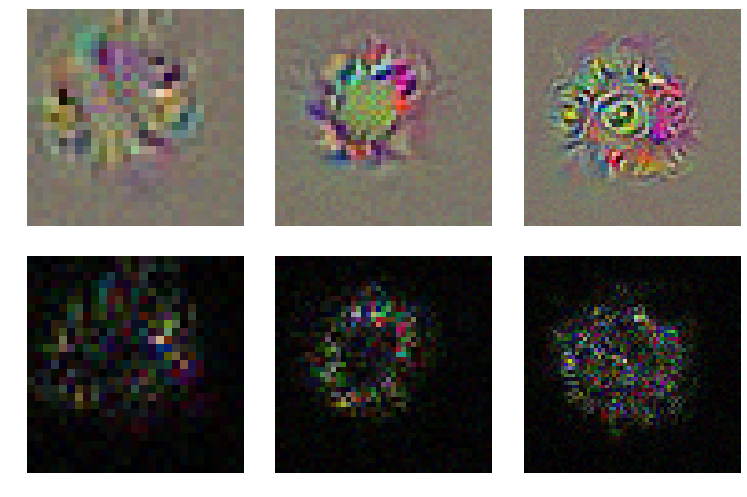

In [30]:
plots.plot_imshows(tmp_imgs, show_flag=True, nrow=2, normalize=None, scale=3.5, exts=exts)

In [35]:
def preprocess(_img):
#     img = plots.normalize_inputspace(_img)
    img = plots.input2image(_img)
    return img

ch = 19
# tmp_imgs = [preprocess(im[ch]) for im in imgs_seed[seed_0]]
# tmp_imgs = tmp_imgs + [np.abs(preprocess(im_0[ch]) - preprocess(im_1[ch])) for im_0, im_1 in zip(imgs_seed[seed_0], imgs_seed[seed_1])]
n_block = 3
tmp_imgs = []
for i in range(n_block):
    img = 0
    for seed in imgs_seed:
        img += imgs_seed[seed][i][ch]
    img /= n_block
    tmp_imgs.append(preprocess(img))

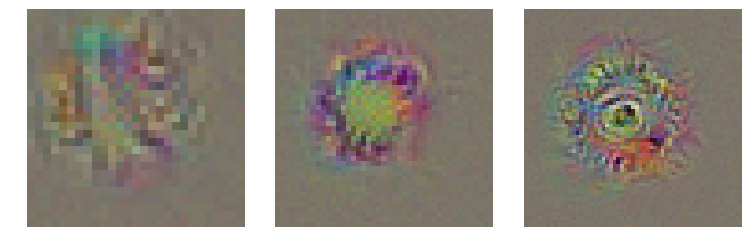

In [37]:
plots.plot_imshows(tmp_imgs, show_flag=True, nrow=1, normalize=None, scale=3.5, exts=exts)

In [82]:
import matplotlib as mpl

In [83]:

font = 'TeX Gyre Heros'
font = "Helvetica"
font = "Computer Modern Sans serif"
plt.rcParams["font.sans-serif"] = font
plt.rc('mathtext', fontset='custom', it=font + ':italic')
# plt.rc('font', size=13)  # change font size from default 10

In [84]:
plt.rcParams["font.sans-serif"]

['Computer Modern Sans serif']

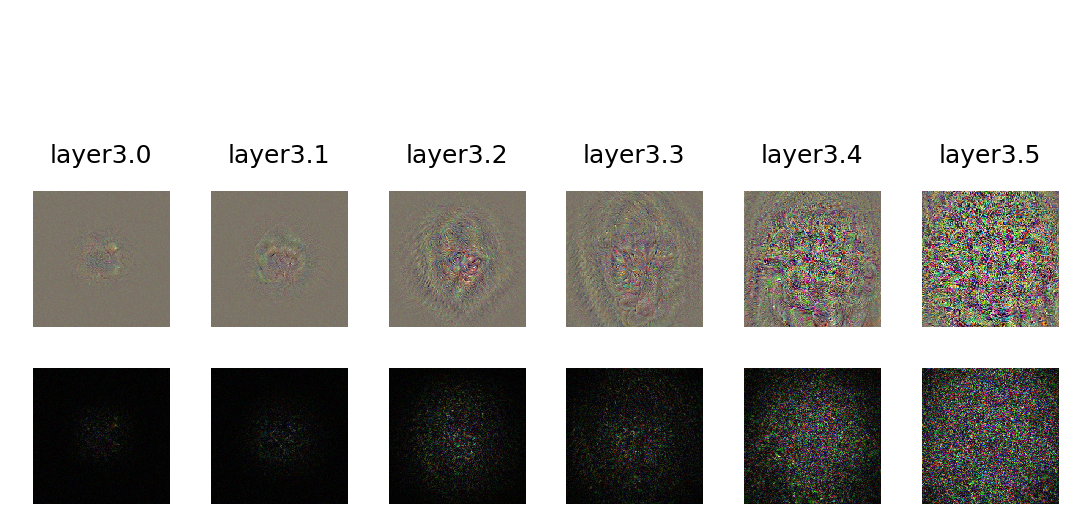

In [85]:
def preprocess(_img):
#     img = plots.normalize_inputspace(_img)
    img = plots.input2image(_img)
    return img

seed_0 = seeds[0]
seed_1 = seeds[1]
ch = 76
# tmp_imgs = [preprocess(im[ch]) for im in imgs_seed[seed_0]]
# tmp_imgs = tmp_imgs + [np.abs(preprocess(im_0[ch]) - preprocess(im_1[ch])) for im_0, im_1 in zip(imgs_seed[seed_0], imgs_seed[seed_1])]

block_n = 6
layer_name = ["layer3.{}".format(i) for i in range(block_n)]
datas = [
    layer_name, 
    [preprocess(im[ch]) for im in imgs_seed[seed_0]],
    [np.abs(preprocess(im_0[ch]) - preprocess(im_1[ch])) for im_0, im_1 in zip(imgs_seed[seed_0], imgs_seed[seed_1])]
]

scale = 2.5
# scale = 1
fontsize = 10

nrow = len(datas)
ncol = block_n
fig, axs = plt.subplots(nrow, ncol, figsize=(ncol * scale, nrow * scale))

for i in range(nrow):
    for j in range(ncol):
        ax = axs[i, j]
        data = datas[i][j]
        if data is None:
            pass
        elif isinstance(data, str):
            x = 0.5
            y = 0.0
            ax.text(x, y, data, horizontalalignment="center", verticalalignment="center", family="sans-serif", fontsize=scale * fontsize)
        elif isinstance(data, np.ndarray):
            ax.imshow(np.transpose(data, (1, 2, 0)))
        ax.axis("off")

plt.tight_layout()
plt.show()

In [14]:
for ch in range(len(imgs[0])):
    tmp_imgs = [plots.input2image(plots.normalize_inputspace(im[ch])) for im in imgs]
    out_name = "{:03}".format(ch)
    plots.plot_imshows(tmp_imgs, show_flag=False, nrow=1, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)

In [15]:
root = "/data2/genta/resnet/analysis/optimalinput-seeds/"
key_arch = "resnet34-skip4"
key_layer = "layer2"

In [16]:
out_dir = os.path.join("20210106", "{}_{}".format(key_arch, key_layer))
make_dir(out_dir)

In [17]:
seed = 0
imgs = []
for path in sorted(glob(os.path.join(root, "{}*{}*".format(key_arch, key_layer), "*{:08}.npy".format(seed)))):
    if "add_func" in path:
        print(path)
        data = np.load(path)
        print(data.shape)
        imgs.append(data)

/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer2.0.add_func/other-images00000000.npy
(128, 3, 83, 83)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer2.1.add_func/other-images00000000.npy
(128, 3, 115, 115)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer2.2.add_func/other-images00000000.npy
(128, 3, 147, 147)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer2.3.add_func/other-images00000000.npy
(128, 3, 179, 179)


In [18]:
for ch in range(len(imgs[0])):
    tmp_imgs = [plots.input2image(plots.normalize_inputspace(im[ch])) for im in imgs]
    out_name = "{:03}".format(ch)
    plots.plot_imshows(tmp_imgs, show_flag=False, nrow=1, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)

In [19]:
root = "/data2/genta/resnet/analysis/optimalinput-seeds/"
key_arch = "resnet34-skip4"
key_layer = "layer1"

In [20]:
out_dir = os.path.join("20210106", "{}_{}".format(key_arch, key_layer))
make_dir(out_dir)

In [21]:
seed = 0
imgs = []
for path in sorted(glob(os.path.join(root, "{}*{}*".format(key_arch, key_layer), "*{:08}.npy".format(seed)))):
    if "add_func" in path:
        print(path)
        data = np.load(path)
        print(data.shape)
        imgs.append(data)

/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer1.0.add_func/other-images00000000.npy
(64, 3, 27, 27)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer1.1.add_func/other-images00000000.npy
(64, 3, 43, 43)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer1.2.add_func/other-images00000000.npy
(64, 3, 59, 59)


In [22]:
for ch in range(len(imgs[0])):
    tmp_imgs = [plots.input2image(plots.normalize_inputspace(im[ch])) for im in imgs]
    out_name = "{:03}".format(ch)
    plots.plot_imshows(tmp_imgs, show_flag=False, nrow=1, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)

In [23]:
root = "/data2/genta/resnet/analysis/optimalinput-seeds/"
key_arch = "resnet34-skip4"
key_layer = "layer4"

In [24]:
out_dir = os.path.join("20210106", "{}_{}".format(key_arch, key_layer))
make_dir(out_dir)

In [25]:
seed = 0
imgs = []
for path in sorted(glob(os.path.join(root, "{}*{}*".format(key_arch, key_layer), "*{:08}.npy".format(seed)))):
    if "add_func" in path:
        print(path)
        data = np.load(path)
        print(data.shape)
        imgs.append(data)

/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer4.0.add_func/other-images00000000.npy
(512, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer4.1.add_func/other-images00000000.npy
(512, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-seeds/resnet34-skip4_layer-layer4.2.add_func/other-images00000000.npy
(512, 3, 224, 224)


In [26]:
for ch in range(len(imgs[0])):
    tmp_imgs = [plots.input2image(plots.normalize_inputspace(im[ch])) for im in imgs]
    out_name = "{:03}".format(ch)
    plots.plot_imshows(tmp_imgs, show_flag=False, nrow=1, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)

In [27]:
root = "/data2/genta/resnet/analysis/optimalinput-clipadam-lr0.01-wd0.00001-maxiter50/"
key_arch = "resnet34-skip4"
key_layer = "layer4"

In [28]:
out_dir = os.path.join("20210106_adam", "{}_{}".format(key_arch, key_layer))
make_dir(out_dir)

In [29]:
seed = 0
imgs = []
for path in sorted(glob(os.path.join(root, "{}*{}*".format(key_arch, key_layer), "*{:08}.npy".format(seed)))):
    if "add_func" in path:
        print(path)
        data = np.load(path)
        print(data.shape)
        imgs.append(data)

/data2/genta/resnet/analysis/optimalinput-clipadam-lr0.01-wd0.00001-maxiter50/resnet34-skip4_layer-layer4.0.add_func/neuron-images00000000.npy
(512, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-clipadam-lr0.01-wd0.00001-maxiter50/resnet34-skip4_layer-layer4.1.add_func/neuron-images00000000.npy
(512, 3, 224, 224)
/data2/genta/resnet/analysis/optimalinput-clipadam-lr0.01-wd0.00001-maxiter50/resnet34-skip4_layer-layer4.2.add_func/neuron-images00000000.npy
(512, 3, 224, 224)


In [30]:
for ch in range(len(imgs[0])):
    tmp_imgs = [plots.input2image(plots.normalize_inputspace(im[ch])) for im in imgs]
    out_name = "{:03}".format(ch)
    plots.plot_imshows(tmp_imgs, show_flag=False, nrow=1, normalize=None, scale=3.5, exts=exts, out_dir=out_dir, out_name=out_name)